<a href="https://colab.research.google.com/github/theBuluku/The-Autolib-Super-Project/blob/master/The_Autolib_Super_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Set-Up


In [0]:
#Importing the tools to use in the project.

import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Hypothesis Statement.

There are more blue cars at a particular station during weekdays as compared to weekends.

#Data Display

In [0]:
#Importing/loading our data through the url method.
#Loading my dataset for analysis
url='http://bit.ly/DSCoreAutolibDataset'
autolib_dataset= pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
autolib_dataset.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


Checking more information in the dataset.

In [0]:
#Giving a brief information about the dataset.
autolib_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [0]:
#Displays all the information of all the columns.
autolib_dataset.describe(include='all')

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085,16085.000000,16085.000000,16085,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
unique,NaN,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,6/1/2018,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,104,NaN,NaN,11544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,88791.293876,NaN,1431.330619,2.969599,NaN,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,NaN,33.212050,2.008378,NaN,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,NaN,1174.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,NaN,1439.000000,1.000000,NaN,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,NaN,1440.000000,3.000000,NaN,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,NaN,1440.000000,5.000000,NaN,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000


In [0]:
#Displys names of all columns
autolib_dataset.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [0]:
#gives the number of rows and columns
print(autolib_dataset.shape)

(16085, 13)


In [0]:
print(autolib_dataset.nunique())

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64


#STATISTICAL OVERVIEW.

In [0]:
autolib_dataset.describe()

,POSTAL_CODE,DAILY_DATA_POINTS,DAY,SUM_OF_BLUECARS_TAKEN,SUM_OF_BLUECARS_RETURNED,SUM_OF_FREED_SLOTS,SUM_OF_TAKEN_SLOTS
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,360.000000,359.000000


#DATA CLEANING.

In [0]:
#Dropping unnecessary columns
autolib_dataset.drop(["Utilib_taken_sum", "Utilib_returned_sum","Utilib_14_taken_sum","Utilib_14_returned_sum"], axis = 1, inplace = True)


In [0]:
#Displaying the remaining names of all columns
autolib_dataset.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Slots_freed_sum',
       'Slots_taken_sum'],
      dtype='object')

In [0]:
autolib_dataset=autolib_dataset.rename({'Postal code':'POSTAL_CODE','date':'DATE','n_daily_data_points':'DAILY_DATA_POINTS','dayOfWeek':'DAY','day_type':'DAY_TYPE','BlueCars_taken_sum':'SUM_OF_BLUECARS_TAKEN','BlueCars_returned_sum':'SUM_OF_BLUECARS_RETURNED','Slots_freed_sum':'SUM_OF_FREED_SLOTS','Slots_taken_sum':'SUM_OF_TAKEN_SLOTS'}, axis='columns')

autolib_dataset.head()

,POSTAL_CODE,DATE,DAILY_DATA_POINTS,DAY,DAY_TYPE,SUM_OF_BLUECARS_TAKEN,SUM_OF_BLUECARS_RETURNED,SUM_OF_FREED_SLOTS,SUM_OF_TAKEN_SLOTS
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


In [0]:
autolib_dataset.fillna(autolib_dataset.mean())
autolib_dataset.head(10)

,POSTAL_CODE,DATE,DAILY_DATA_POINTS,DAY,DAY_TYPE,SUM_OF_BLUECARS_TAKEN,SUM_OF_BLUECARS_RETURNED,SUM_OF_FREED_SLOTS,SUM_OF_TAKEN_SLOTS
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,23,22


Checking for Outliiers.

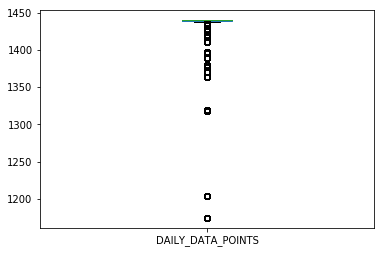

In [0]:
#checking for outliers
autolib_dataset['DAILY_DATA_POINTS'].plot(kind='box')

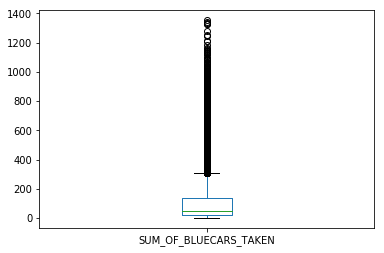

In [0]:
autolib_dataset['SUM_OF_BLUECARS_TAKEN'].plot(kind='box')

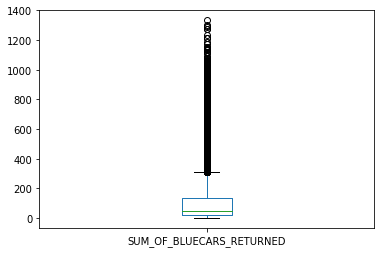

In [0]:
autolib_dataset['SUM_OF_BLUECARS_RETURNED'].plot(kind='box')

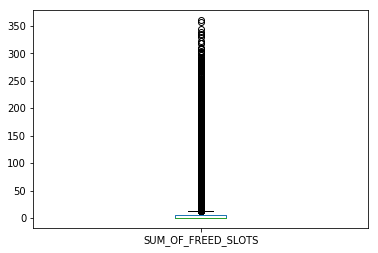

In [0]:
autolib_dataset['SUM_OF_FREED_SLOTS'].plot(kind='box')

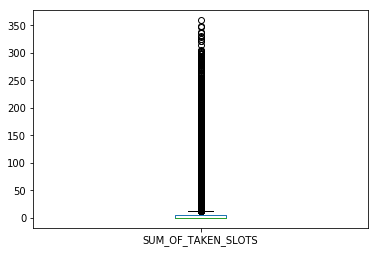

In [0]:
autolib_dataset['SUM_OF_TAKEN_SLOTS'].plot(kind='box')

#UNIVARIATE ANALYSIS.

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

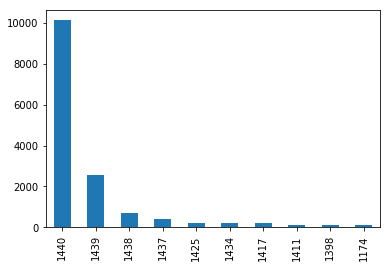

In [0]:
autolib_dataset['DAILY_DATA_POINTS'].value_counts().plot.bar()

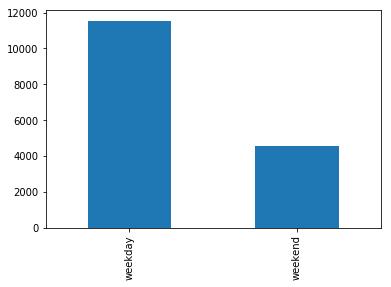

In [0]:
autolib_dataset['DAY_TYPE'].value_counts().head(10).plot.bar()

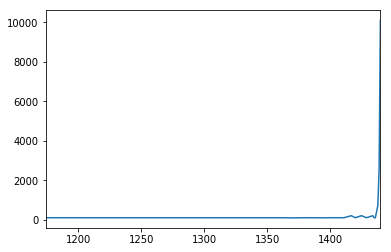

In [0]:
autolib_dataset['DAILY_DATA_POINTS'].value_counts().sort_index().plot.line()

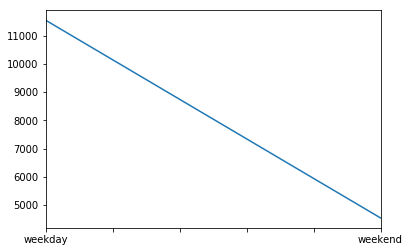

In [0]:
autolib_dataset['DAY_TYPE'].value_counts().sort_index().plot.line()

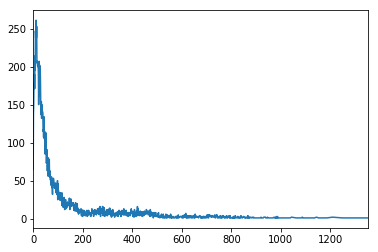

In [0]:
autolib_dataset['SUM_OF_BLUECARS_TAKEN'].value_counts().sort_index().plot.line()

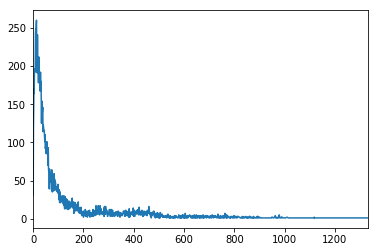

In [0]:
autolib_dataset['SUM_OF_BLUECARS_RETURNED'].value_counts().sort_index().plot.line()

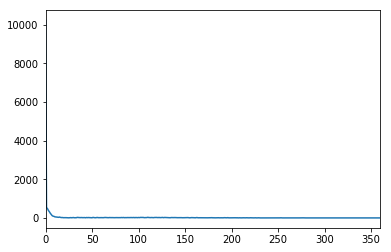

In [0]:
autolib_dataset['SUM_OF_FREED_SLOTS'].value_counts().sort_index().plot.line()

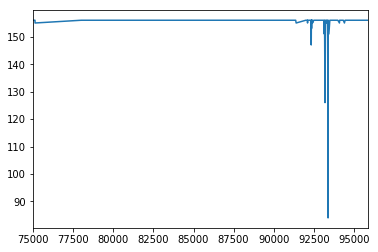

In [0]:
autolib_dataset['POSTAL_CODE'].value_counts().sort_index().plot.line()

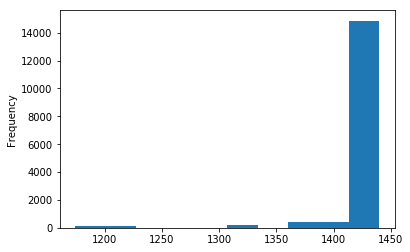

In [0]:
autolib_dataset['DAILY_DATA_POINTS'].plot.hist()


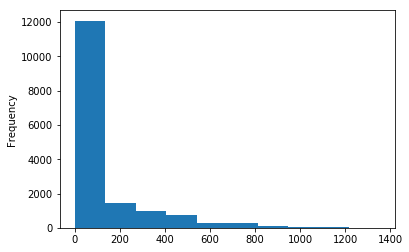

In [0]:
autolib_dataset['SUM_OF_BLUECARS_TAKEN'].plot.hist()


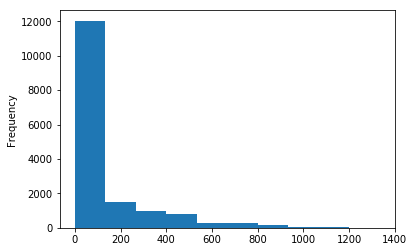

In [0]:
autolib_dataset['SUM_OF_BLUECARS_RETURNED'].plot.hist()

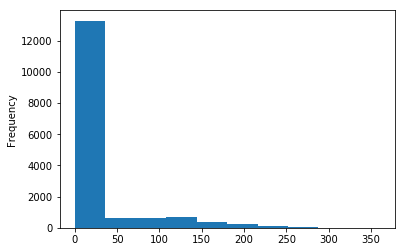

In [0]:
autolib_dataset['SUM_OF_FREED_SLOTS'].plot.hist()

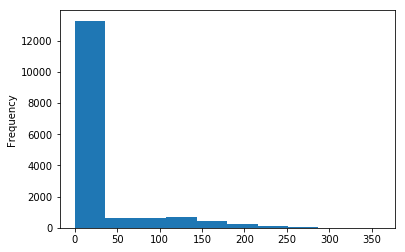

In [0]:
autolib_dataset['SUM_OF_TAKEN_SLOTS'].plot.hist()

#BIVARIATE ANALYSIS.

Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis.It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.

Bivariate analysis can be helpful in testing simple hypotheses of association. Bivariate analysis can help determine to what extent it becomes easier to know and predict a value for one variable (possibly a dependent variable) if we know the value of the other variable (possibly the independent variable).

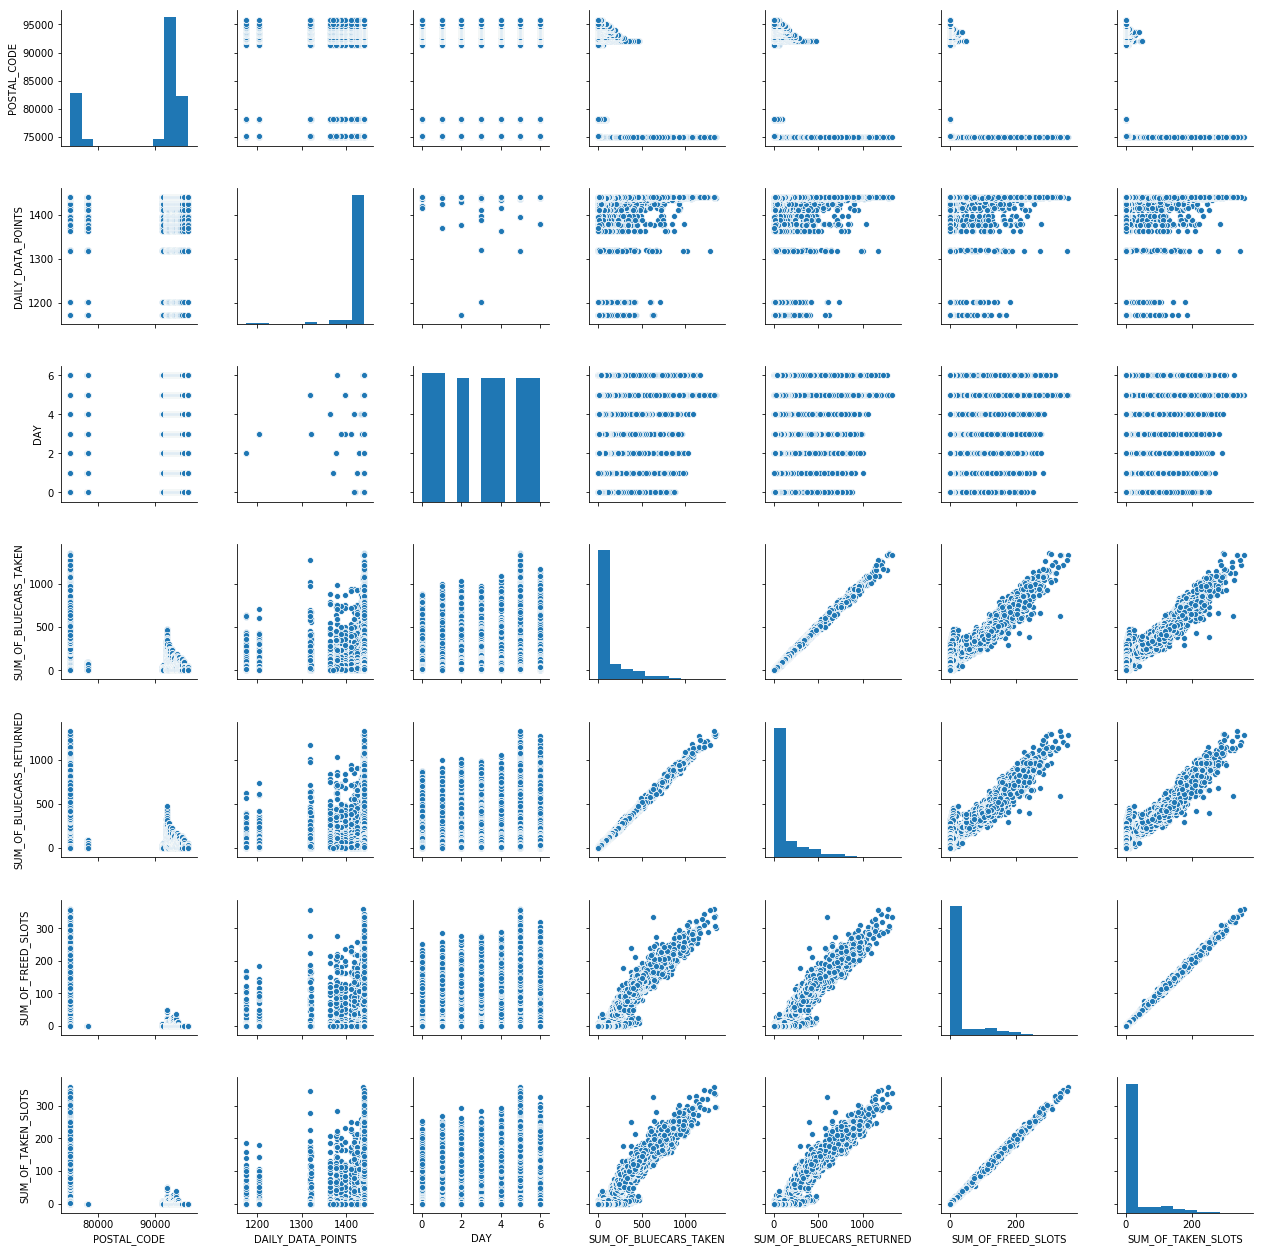

In [0]:
#Visualization of the general data with different columns
sns.pairplot(autolib_dataset)

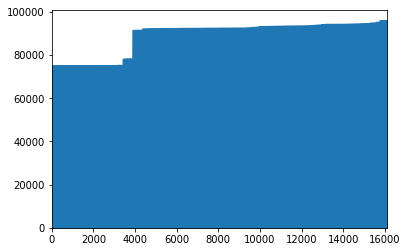

In [0]:
autolib_dataset['POSTAL_CODE'].plot.area()

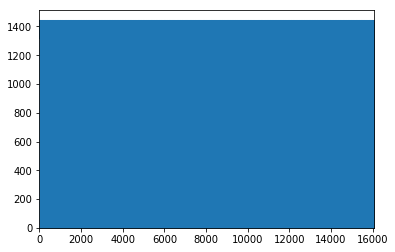

In [0]:
autolib_dataset['DAILY_DATA_POINTS'].plot.area()

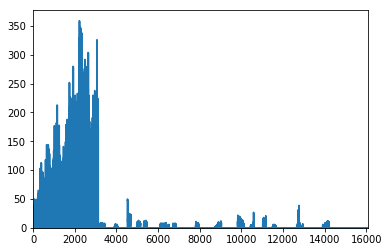

In [0]:
autolib_dataset['SUM_OF_TAKEN_SLOTS'].plot.area()

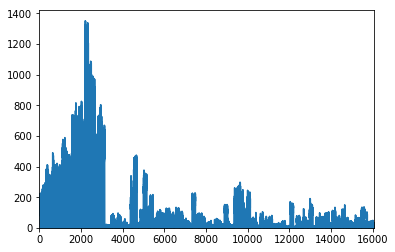

In [0]:
autolib_dataset['SUM_OF_BLUECARS_TAKEN'].plot.area()

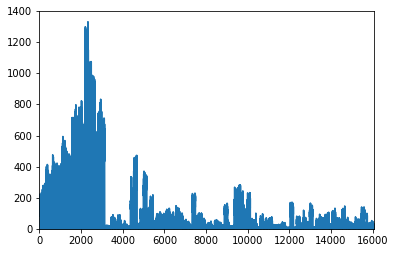

In [0]:
autolib_dataset['SUM_OF_BLUECARS_RETURNED'].plot.area()

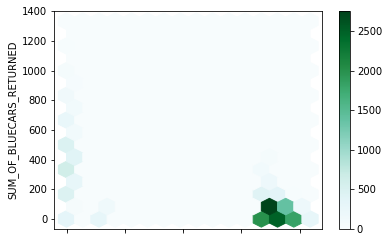

In [0]:
autolib_dataset.plot.hexbin(x='POSTAL_CODE', y='SUM_OF_BLUECARS_RETURNED', gridsize=15)

In [0]:
autolib_stat = autolib_dataset.groupby('POSTAL_CODE').mean()[['SUM_OF_BLUECARS_TAKEN',	'SUM_OF_BLUECARS_RETURNED',	'SUM_OF_FREED_SLOTS',	'SUM_OF_TAKEN_SLOTS']]
autolib_stat

,SUM_OF_BLUECARS_TAKEN,SUM_OF_BLUECARS_RETURNED,SUM_OF_FREED_SLOTS,SUM_OF_TAKEN_SLOTS
POSTAL_CODE,,,,
75001,134.583333,134.448718,22.423077,22.371795
75002,173.993590,173.903846,35.070513,35.089744
75003,238.384615,238.166667,61.173077,61.179487
75004,201.628205,201.596154,46.371795,46.397436
75005,306.192308,306.108974,91.423077,91.333333
75006,266.115385,265.967949,50.467949,50.410256
75007,290.288462,289.685897,92.948718,92.846154
75008,437.480769,437.147436,134.121795,133.967949
75009,339.121795,338.852564,77.769231,77.679487


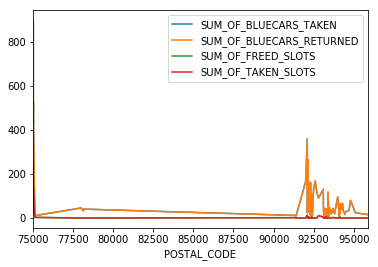

In [0]:
autolib_stat.plot.line()

In [0]:
autolib_stat1 = autolib_dataset.groupby('DAY').mean()[['SUM_OF_BLUECARS_TAKEN',	'SUM_OF_BLUECARS_RETURNED',	'SUM_OF_FREED_SLOTS',	'SUM_OF_TAKEN_SLOTS']]
autolib_stat1

,SUM_OF_BLUECARS_TAKEN,SUM_OF_BLUECARS_RETURNED,SUM_OF_FREED_SLOTS,SUM_OF_TAKEN_SLOTS
DAY,,,,
0,111.159646,111.545072,19.807077,19.826453
1,110.850614,110.228523,19.930174,19.876851
2,115.453704,114.935185,20.869048,20.821429
3,116.052469,115.944004,21.252205,21.174162
4,127.056803,125.948481,22.960370,23.000440
5,156.124393,155.081606,27.833260,27.943979
6,146.071240,148.986368,25.989006,26.000880


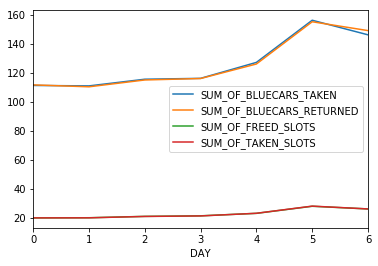

In [0]:
autolib_stat1.plot.line()

In [0]:
weekday_df = autolib_dataset[autolib_dataset['DAY_TYPE'] == 'weekday']
weekday_df.head()

,POSTAL_CODE,DATE,DAILY_DATA_POINTS,DAY,DAY_TYPE,SUM_OF_BLUECARS_TAKEN,SUM_OF_BLUECARS_RETURNED,SUM_OF_FREED_SLOTS,SUM_OF_TAKEN_SLOTS
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


In [0]:
autolib_stat2 = autolib_dataset.groupby('DAY').mean()[['SUM_OF_BLUECARS_TAKEN',	'SUM_OF_BLUECARS_RETURNED',	'SUM_OF_FREED_SLOTS',	'SUM_OF_TAKEN_SLOTS']]
autolib_stat2

,SUM_OF_BLUECARS_TAKEN,SUM_OF_BLUECARS_RETURNED,SUM_OF_FREED_SLOTS,SUM_OF_TAKEN_SLOTS
DAY,,,,
0,111.159646,111.545072,19.807077,19.826453
1,110.850614,110.228523,19.930174,19.876851
2,115.453704,114.935185,20.869048,20.821429
3,116.052469,115.944004,21.252205,21.174162
4,127.056803,125.948481,22.960370,23.000440
5,156.124393,155.081606,27.833260,27.943979
6,146.071240,148.986368,25.989006,26.000880


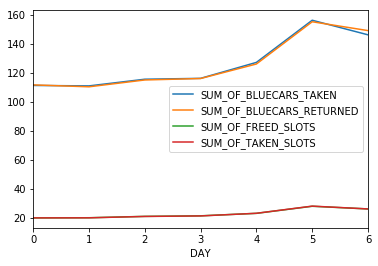

In [0]:
autolib_stat2.plot.line()

#MULTIVARIATE ANALYSIS.

Multivariate analysis (MVA) is based on the statistical principle of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time. In design and analysis, the technique is used to perform i.e trade studies across multiple dimensions while taking into account the effects of all variables on the responses of interest.

#SAMPLING.

Sampling is a process used in statistical analysis in which a predetermined number of observations are taken from a larger population. The methodology used to sample from a larger population depends on the type of analysis being performed but may include simple random sampling or systematic sampling.

#EXPLORATORY DATA ANALYSIS.